<a href="https://colab.research.google.com/github/aprilcao221/Practice/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()
df.tail()

,DATE,TAG,POSTS
2588,2024-02-01 00:00:00,php,1506
2589,2024-02-01 00:00:00,python,8659
2590,2024-02-01 00:00:00,r,1876
2591,2024-02-01 00:00:00,ruby,163
2592,2024-02-01 00:00:00,swift,738


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2593, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()

<ipython-input-39-e0b10c91de87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POSTS
TAG,
assembly,44059
c,403132
c#,1612474
c++,805242
delphi,51751
go,72450
java,1914591
javascript,2524443
perl,68054


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,187,187
c,187,187
c#,188,188
c++,187,187
delphi,187,187
go,172,172
java,187,187
javascript,187,187
perl,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
pd.to_datetime(df.DATE)
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df.head()
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 99, 75, 5, 30]})
new_test_df =test_df.pivot(index='Age', columns='Actor', values='Power')
new_test_df.head()

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,30.0
Young,80.0,100.0,25.0,NaN


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,606.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


In [ ]:
reshaped_df.shape

(188, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

TAG
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

In [ ]:
reshaped_df.count() - df.groupby('TAG')['POSTS'].count()

TAG
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


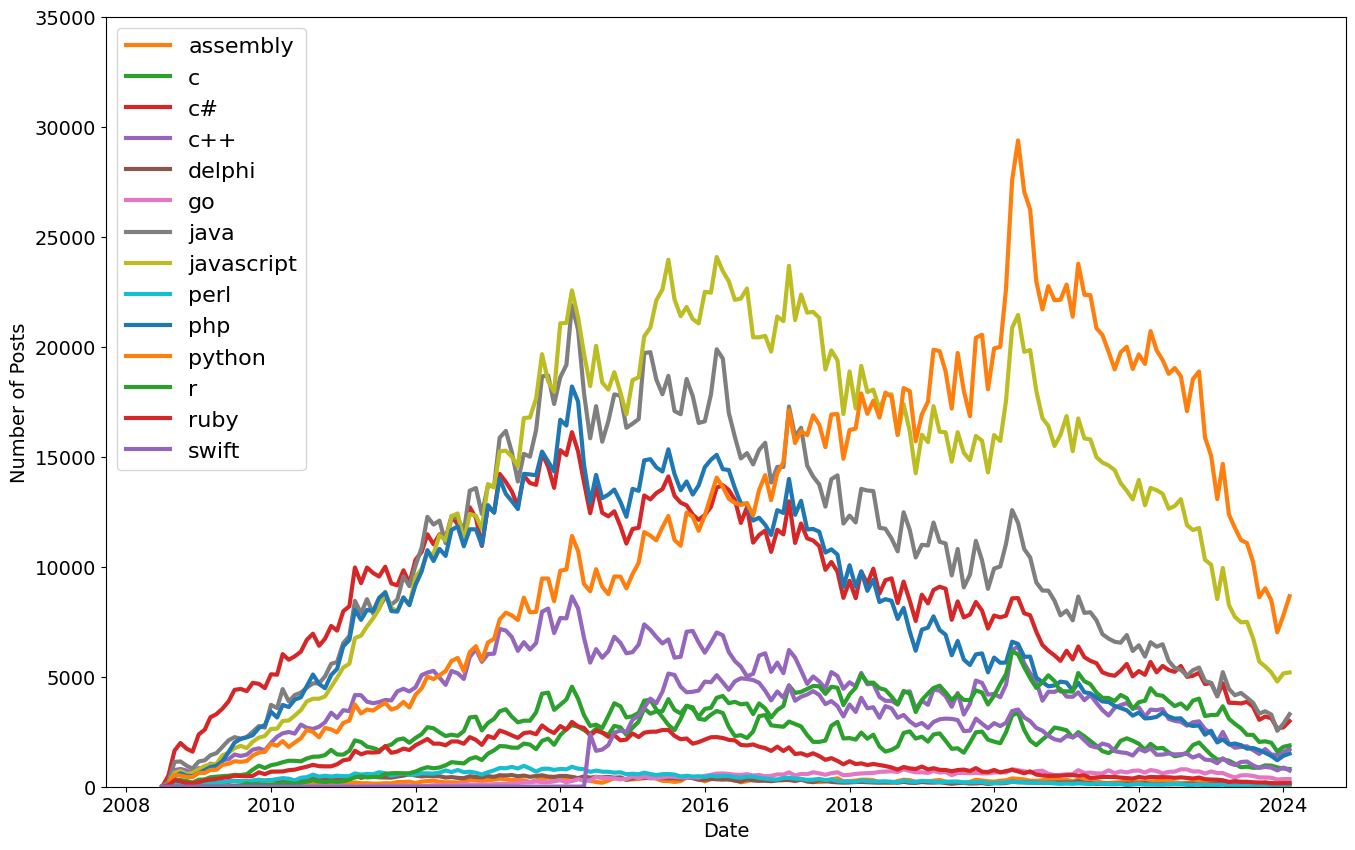

In [ ]:
# to make the chart bigger
plt.figure(figsize=(16,10))
# increase fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# set up labels
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
# set up limits
plt.ylim(0, 35000)
# plot a specific column
plt.plot(reshaped_df.index, reshaped_df['python'])
# plot all the columns
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
# write down column names
plt.legend(fontsize=16)



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

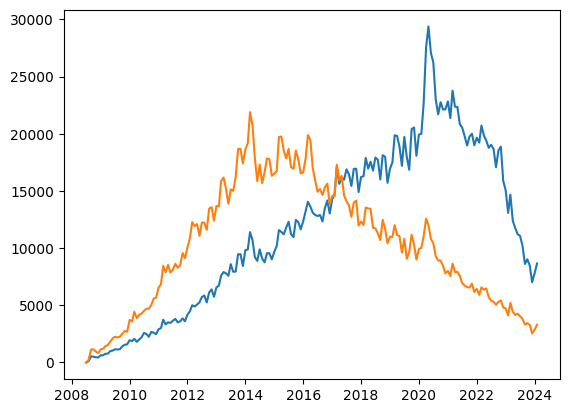

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.plot(reshaped_df.index, reshaped_df['java'])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

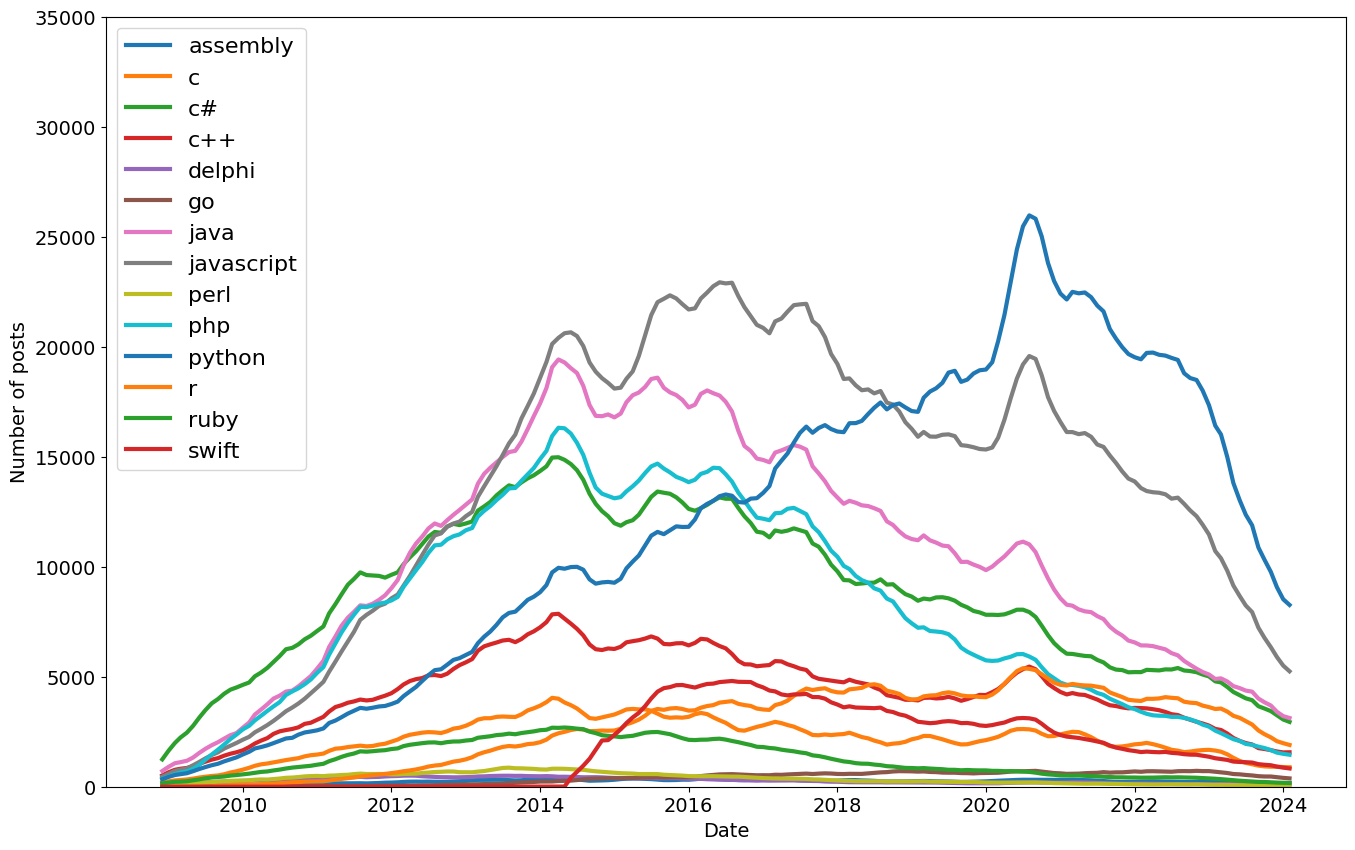

In [ ]:
# window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
